# Visualizing the Titanic Manifest Dataset

Insert brief discussion of Titanic Manifest Dataset.  Possibly include a data dictionary

### Read in data and import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

titanic = pd.read_csv('./train.csv')

### Data Cleaning

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 687 null values for 'Cabin', out of 891 total passengers. Additionally, the 'Age' column has 177 missing values, and 'Embarked' has 2.

In [7]:
#Delete rows with Embarked information missing
titanic = titanic[titanic['Embarked'].notnull()]

In [8]:
#Fill null values in Cabin column to allow manipulation
titanic['Cabin'] = titanic['Cabin'].fillna('empty')

### Feature Engineering

In [9]:
#Combines parents/children and siblings/spouses columns to create a feature for total family members on board 
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']

#One-hot encoding embark port and gender
titanic[['Embarked_C','Embarked_Q','Embarked_S']] = pd.get_dummies(titanic['Embarked'])
titanic[['Female','Male']] = pd.get_dummies(titanic['Sex'])

#Title feature: the lambda function splits the Name string at the comma
#and again at the period following, to isolate passenger title.
titanic['Title'] = titanic['Name'].map(lambda x: x.split(', ')[1].split('.')[0])
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [10]:
#One-hot encoding titles
#(feeds in alphabetically sorted list of unique titles)
titanic[sorted(list(titanic['Title'].unique()))] = pd.get_dummies(titanic['Title'])

### Survival Correlation Heatmap

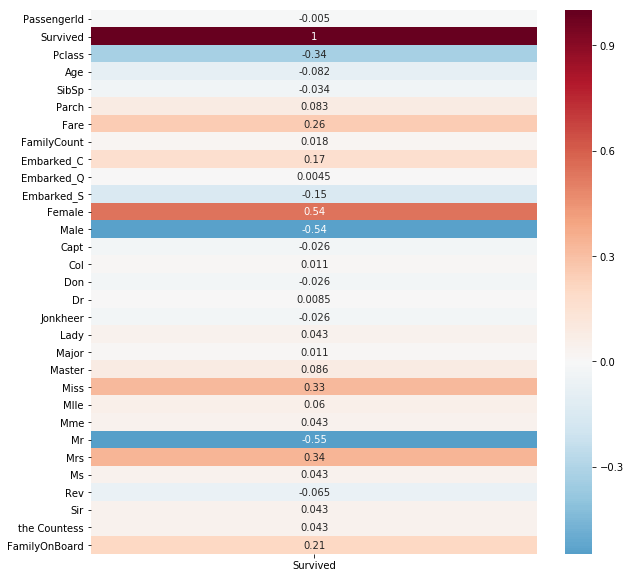

In [45]:
#The following heatmap shows the correlation of all variables with Survival
plt.figure(figsize=(10,10))
sns.heatmap(titanic.corr()[['Survived']],cmap="RdBu_r",center=0.0, annot=True);

Right off the bat, we can see that gender is a primary predictor of survival, with females more likely to survive and males less likely.  Other associations that jump out are: the lower (i.e.; better) your class and the higher your fare, the higher your chance of survival.  We also notice that those embarking at port C seem to do slightly better, and those embarking at port S slightly worse.  However this may be confounded by say, a higher proportion of low-fare passengers embarking at port S.

### Survival by Gender, Passenger Class, Port of Embarkation

In [12]:
#Overall survival rate
titanic['Survived'].mean()

0.38245219347581555

In [13]:
#Survival rate by sex
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [14]:
#Survival rate by passenger class (1 is most expensive)
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
#Survival rate by port of embarkation (potentially confounded with passenger class)
titanic.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

The overall survival rate on the manifest is 38.2%.  The standout gap is by gender: 74% of females survived, compared to 19% of males.  This is likely due to the "women and children first" rules when filling the lifeboats. As one might expect, passengers with higher class tickets were also more likely to survive.

### Survival by Missing Data

In [16]:
#Survival rate for passengers with no cabin listing
print('Without cabin listing: ', titanic[titanic['Cabin']=='empty']['Survived'].mean())

#Survival rate for passengers WITH cabin listing
print('With cabin listing: ', titanic[titanic['Cabin']!='empty']['Survived'].mean())

#Survival rate for passengers with no age information
print('Without age data: ', titanic[titanic['Age'].isnull()==True]['Survived'].mean())

#Survival rate for passengers with age information
print('With age data: ', titanic[titanic['Age'].notnull()==True]['Survived'].mean())

Without cabin listing:  0.29985443959243085
With cabin listing:  0.6633663366336634
Without age data:  0.2937853107344633
With age data:  0.4044943820224719


Survival is noticeably below average where information is missing.  Accurate documentation may have been an issue with passengers who did not survive.

### Survival by Title

In [17]:
#Survival breakdown by title with counts
titles = pd.DataFrame(titanic.groupby('Title')['Survived'].sum())
titles['Total Count'] = titanic.groupby('Title')['Survived'].count()
titles['Survival Rate'] = titanic.groupby('Title')['Survived'].mean()
titles.rename(columns = {'Survived':'Survival Count'}, inplace=True)
titles

,Survival Count,Total Count,Survival Rate
Title,,,
Capt,0,1,0.000000
Col,1,2,0.500000
Don,0,1,0.000000
Dr,3,7,0.428571
Jonkheer,0,1,0.000000
Lady,1,1,1.000000
Major,1,2,0.500000
Master,23,40,0.575000
Miss,126,181,0.696133


### VISUALIZATION:  Survival by Family Members on Board

In [18]:
#Correlation between survival rate and total family on board, overall
np.corrcoef(titanic['FamilyCount'],titanic['Survived'])[0,1]

0.01827746832759371

Correlation of .018 suggests next to no association between survival and number of family members.  Let's look closer though.  First, let's look at having family vs not having family, as a binary.

In [19]:
print('Survival rate with no family on board: {}'.format(titanic[titanic['FamilyCount']==0]['Survived'].mean()))
print('Survival rate with family on board: {}'.format(titanic[titanic['FamilyCount']>0]['Survived'].mean()))

Survival rate with no family on board: 0.30093457943925234
Survival rate with family on board: 0.5056497175141242


So, as a binary, people with family on board had a 50.6% survival rate, compared to a 30.1% survival rate among people with no family on board.   Let's take one closer look at the distribution here with a visualization:

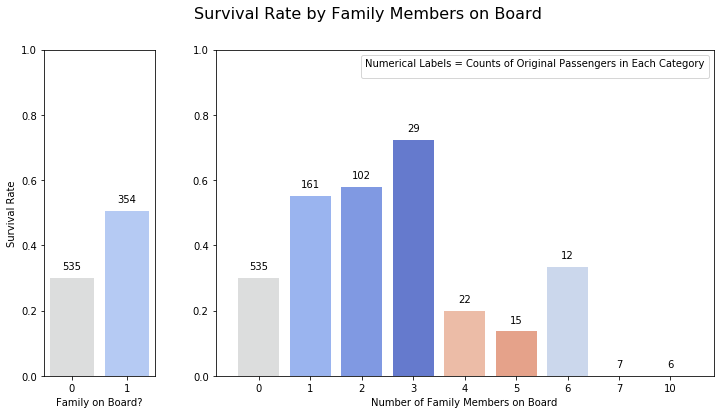

In [44]:
#BUILDING PLOT DATA
#----------------------------------
#Creates binary column for whether a passenger has family on board
titanic['FamilyOnBoard'] = titanic['FamilyCount'].map(lambda x: 1 if x>0 else 0)
rates_binary = list(titanic.groupby('FamilyOnBoard')['Survived'].mean())

#This shows us which values exist for FamilyCount and sorts them in a list (x-values):
nums_members = sorted(titanic['FamilyCount'].unique())

#Creates a function that takes a number and returns survival rate for people
#with that number of family members on board
def survival_rate_by_family_count(n):
    survival_rate = titanic[titanic['FamilyCount']==n]['Survived'].mean()
    return survival_rate

#Returns survival rates by count of family members (y-values)
rates_members = [survival_rate_by_family_count(i) for i in nums_members]

#Returns the raw counts for each category that will be in the plot 
#(e.g.; how many people are there with family? how many people are there with 6 family members?)
counts_binary = list(titanic['FamilyOnBoard'].value_counts())
counts_members = list(titanic['FamilyCount'].value_counts())


#SUBPLOTS WITH MATPLOTLIB, SEABORN
#------------------------------------------
#Create subplots layout with width proportions of 2 to 9 (achieves equal bar width)
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2, gridspec_kw = {'width_ratios':[2,9]})
plt.suptitle('Survival Rate by Family Members on Board', fontsize=16)

#Plot Survival Rate by Family on Board, Binary
ax[0].set_xlabel('Family on Board?')
ax[0].set_ylabel('Survival Rate')
ax[0].set_ylim([0,1])
sns.barplot(x=[0,1], 
            y=rates_binary, 
            #Divergent color palette adds impact to visualization of survival rate
            palette="coolwarm_r", 
            hue=rates_binary, 
            #dodge=False prevents presentation issues with redundant data mapping
            dodge=False, 
            ax=ax[0], 
            hue_order=sorted(rates_binary + rates_members))
ax[0].legend_.remove()
#for loop with ax.text to add count labels to the categories
for i in range(len(rates_binary)):
    ax[0].text(x=i,y=.02+rates_binary[i],s=str(counts_binary[i]), ha='center', va='bottom')

#Plot Survival Rate by Family Member Count
ax[1].set_xlabel('Number of Family Members on Board')
ax[1].set_ylim([0,1])
sns.barplot(nums_members, 
            rates_members, 
            palette="coolwarm_r", 
            hue=rates_members, 
            dodge=False, 
            ax=ax[1], 
            #setting hue_order to the combination of means and ratelist...
            #...puts divergent color map onto a single scale across both plots.
            hue_order=sorted(rates_binary + rates_members))
ax[1].legend_.remove();
for i in range(len(rates_members)):
    ax[1].text(x=i,y=.02+rates_members[i],s=str(counts_members[i]), ha='center', va='bottom')

#Used an empty artist to create legend with text string clarifying labels
empty = plt.plot([], [], '')
plt.legend(empty,'',title="Numerical Labels = Counts of Original Passengers in Each Category");

Here we can see clearly that having family on board is associated with increased likelihood of survival overall, however there is more to the story.  It appears that survival rate increases with number of family members at low numbers, up to a peak of 72.4% survival for people with 3 family members.  However, survival rate falls off sharply for people with 4 or more family members.  Some of this may be due to coincidence (the counts for 3+ family members are low), and it's also possible larger families had lower class tickets.  However, it is also conceivable that having family members to assist in getting to safety would be a boon up to a point, but larger families may have proven a hindrance, trying to make sure everyone was accounted for, etc etc. 

### VISUALIZATION:  Survival Rate by Sex in Different Age Groups

The following plot idea required a high degree of customization, but I felt it would offer a particularly elegant view of two major survival determinants.

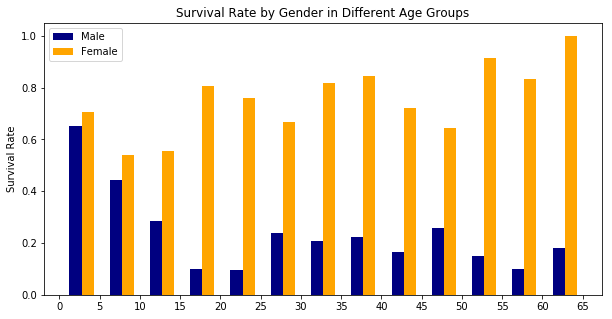

In [43]:
#generate lists of the gender survival rates for each age five year age group between 0 and 65
ratelistmale = [titanic[(titanic['Female']==0)&(titanic['Age']>=i)&(titanic['Age']<(i+5))]['Survived'].mean() for i in range(0,65,5)]
ratelistfemale = [titanic[(titanic['Female']==1)&(titanic['Age']>=i)&(titanic['Age']<(i+5))]['Survived'].mean() for i in range(0,65,5)]

#create figure
fig,ax = plt.subplots(figsize=(10,5))
plt.title('Survival Rate by Gender in Different Age Groups')
plt.ylabel('Survival Rate')

#generate side by side barplots
barWidth = 1.5
plt.bar(np.arange(2,67,5), ratelistmale, color='navy', width=barWidth, label='Male')
plt.bar(np.arange(3.5,68.5,5), ratelistfemale, color='orange', width=barWidth, label='Female')
 
plt.xticks(np.arange(0,70,5))

plt.legend();

What is so interesting here is not just the clear representation of female vs male survival, but also the idea that male survival seems to decrease with age, while female survival increases with age.  In particular, this plot visualizes that children under the age of 5 or even under the age of 10 are treated mostly the same in terms of lifeboat allotments or priority, but from age 12 or so on an enormous gap opens between the genders, indicating that males of age were expected to yield lifeboat seats to women and children.

### VISUALIZATION:  Survival by Age and Fare

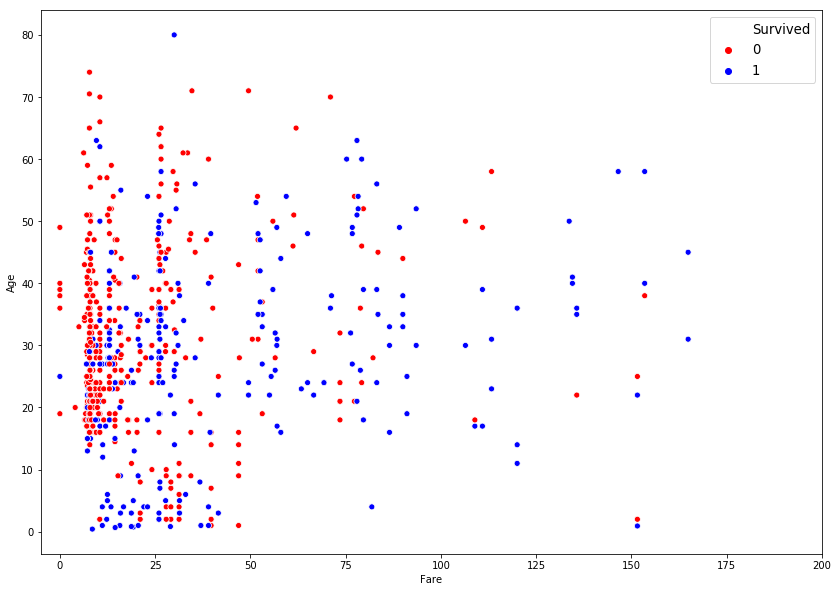

In [42]:
fig, ax = plt.subplots(figsize=(14,10))
plt.xlim(-5,200)

with sns.plotting_context('notebook',font_scale=1.2):
    
    ax = sns.scatterplot(
        x='Fare',
        y='Age',
        hue='Survived',
        palette=['red','blue'],
        data=titanic,
        ax=ax
    )

In this seaborn scatterplot, we get a really nice presentation of the available tiered fares, and the density of passengers with certain fares and at certain ages.  Fares over 200 have not been included, for scaling reasons.  Red indicates that the passenger perished, while Blue indicates survival.  We can see very clearly that the great density of deaths occurred among lower tier pricing passengers between the ages of 17 and 45.  We can see that there is a trend toward survival as fares increase, and also as age decreases.

### VISUALIZATION:  Survival by Class and Sex, Subdivided

C:\Users\eamon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


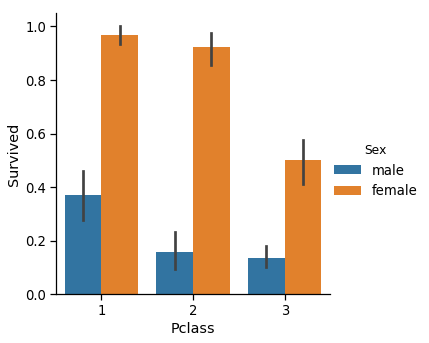

In [41]:
#The Seaborn catplot allows us to break things down by sub-category
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Pclass',
        y='Survived',        
        hue='Sex',
        kind='bar',
        data=titanic,
    )

In [24]:
#for the actual survival rate values in the plot above:
titanic.groupby('Pclass').apply(lambda x: x.groupby('Sex')['Survived'].mean())

Sex,female,male
Pclass,,
1,0.967391,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


The basic takeaway from this plot is that women with Class 1 or Class 2 status were all but guaranteed to survive.  In a tragedy where only 38% of passengers survived overall, the rate of survival for Class 1 women was 97%, and for Class 2 women 92%.  The drop off to 50% survival for Class 3 women makes it clear that this was not purely a situation of "Ladies First".

### VISUALIZATION: Age and Gender Distribution of Survivors and Perished in Each Passenger Class

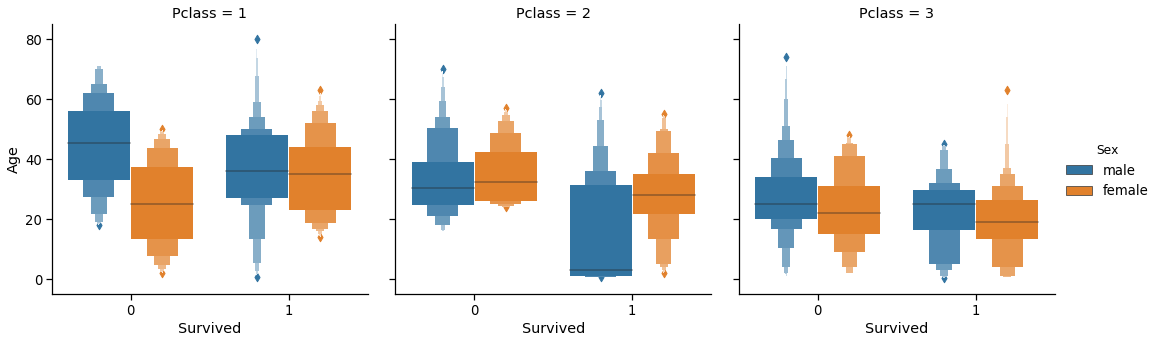

In [40]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Survived', 
        y='Age',
        hue='Sex', 
        col='Pclass',
        data=titanic,
        orient='v', 
        kind='boxen',
    )

While the survival rate bar charts above are more easily comprehended, this plot (Seaborn's boxen catplot) deserves a bit of explication.  The passenger manifest is first divided by class.  Within each class, it is divided into those who perished and those who survived.  Within this division we see the age distribution of the male and female members of the division.  The weakness of this layout is that it doesn't express much about the relative size of the Survived group vs the Perished group in each class.  However it does give us a sense of the summary statistics for each subdivision, and a quick picture of what ages and genders comprised the different groups.  It also allows us to look at age after stratification for class and gender. 

It is worth noting that the middle box represents the interquartile range, or the middle 50% by age in that class/gender subdivision - essentially dividing the distribution into fourths, as a normal boxplot. The innovation of the boxenplot, elsewhere referred to as the letter-value plot, is to further subdivide the distribution into eighths, sixteenths, and so on, with increasingly narrow boxes. This gives a more complete view of the distribution than a boxplot, without requiring the subjectivity of parameter assignments, as in violin plots.

Some interesting takeaways: Class 2 male survivors are comprised largely by children.  We can see that the children male and female were saved entirely in Class 2, with no young among the perished (min age of perished ~ 17). This is in sharp contrast to Class 3, where the fate of children was more indiscriminate.  We can see that in general, within stratifications for class and gender, the perished tended to be slightly older than the survivors.  The notable exception to this is that among women in Class 1, the survivors were broadly older than the perished, suggesting that perhaps old women were given priority among the wealthy.

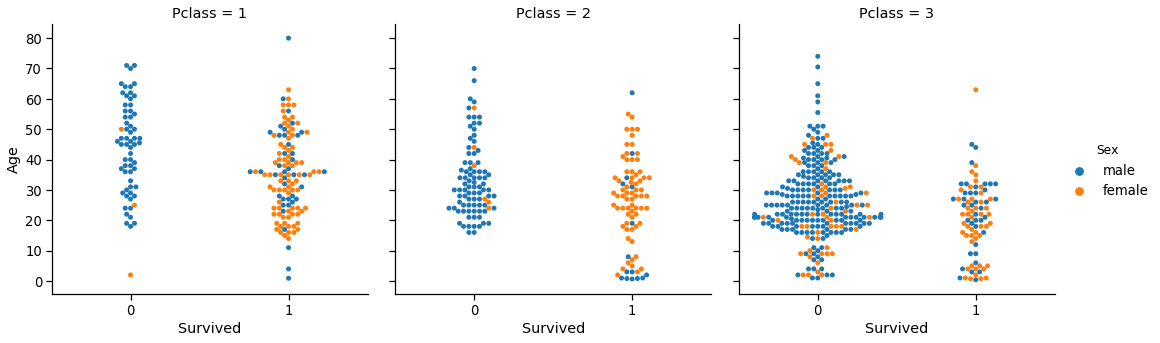

In [26]:
with sns.plotting_context('notebook',font_scale=1.2):

    sns.catplot(
        x='Survived', 
        y='Age',
        hue='Sex', 
        col='Pclass',
        data=titanic,
        orient='v', 
        kind='swarm',
    )

This very similar plot, a swarm plot, lacks an explicit representation of summary statistics. However, it has the great advantage of indicating the size of the subdivisions, and also showing the precise nature of the distribution by displaying every point.  We can see the weakness of the boxenplot in the way it misrepresents small counts as full distributions, in particular class 1 female perished, containing only three individuals.  We also have a clearer picture of the Class 2 male survivor distribution which we discussed above. Finally, in addition to giving a sense of the age distributions for each sex, the intermingling allows you have the shape of the combined, gender-independent age distribution for survived and perished in each class.

This may be my preferred visualization, if I were to choose only one, as it represents survival by class and gender, with a full distribution by age, and every passenger is visualized with a point on the chart.

Can we make it even better?

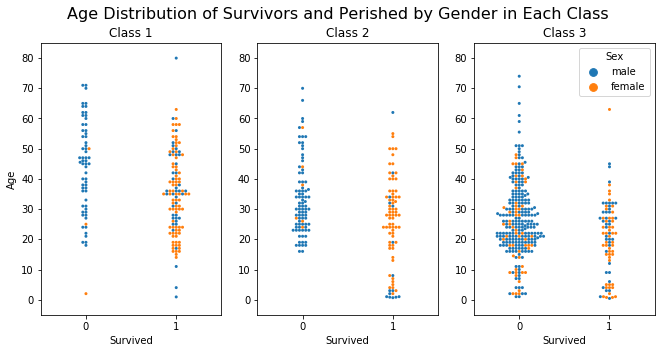

In [38]:
#Using plt.subplots allows us more precise control of the swarmplot functionality
fig, ax = plt.subplots(figsize=(11,5), nrows=1, ncols=3)
plt.suptitle('Age Distribution of Survivors and Perished by Gender in Each Class', fontsize=16)

for i in range(3):
    ax[i].set_title('Class {}'.format(i+1))
    ax[i].set_ylim(-5,85)
    sns.swarmplot(data=titanic[titanic['Pclass']==i+1],
                  x='Survived',
                  y='Age', 
                  hue='Sex',
                  hue_order=['male','female'],
                  size=3,
                  ax=ax[i])

ax[1].set_ylabel(None)
ax[2].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()

This is a proper visualization. Each year of age corresponds to a line, and manipulating the marker size allows the final visual to be crisper.  We can see that the swarmplot is especially well suited to relatively small datasets (<500 individuals). But what if we want to separate the genders out as well?

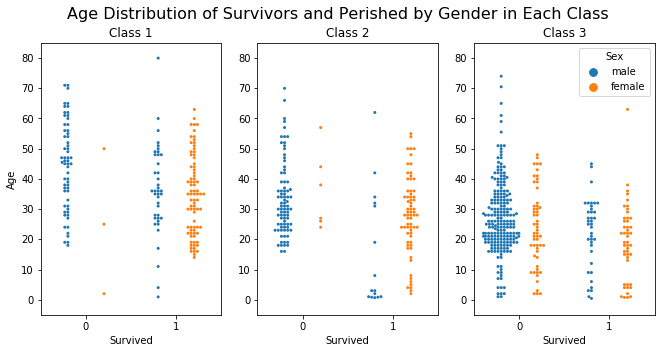

In [39]:
#We can set dodge as True in the swarmplot to split the distributions
fig, ax = plt.subplots(figsize=(11,5), nrows=1, ncols=3)
plt.suptitle('Age Distribution of Survivors and Perished by Gender in Each Class', fontsize=16)

for i in range(3):
    ax[i].set_title('Class {}'.format(i+1))
    ax[i].set_ylim(-5,85)
    sns.swarmplot(data=titanic[titanic['Pclass']==i+1],
                  x='Survived',
                  y='Age', 
                  hue='Sex',
                  hue_order=['male','female'],
                  size=3,
                  dodge=True,
                  ax=ax[i])

ax[1].set_ylabel(None)
ax[2].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()

Here we have achieved a very appealing view of the dataset in which every individual is represented with a point, and class, age and gender have all been represented intuitively.  One can look at this and say, as a thirty year old man, how likely would I have been to survive, depending on my ticket class, and see the answer clearly.